In [76]:
from modules.imageDiffusion import ImageDiffusionModule
from utils import get_ckpt
import yaml

parent_log_dir = 'logs/imageDiffusion/train/'
checkpoint = get_ckpt(parent_log_dir, config_name='hparams.yaml', with_streamlit=False)
   

54: logs/imageDiffusion/train/version_54/checkpoints/epoch=32-step=64920.ckpt
56: logs/imageDiffusion/train/version_56/checkpoints/epoch=33-step=65670.ckpt


In [114]:
plModule = ImageDiffusionModule.load_from_checkpoint(checkpoint['ckpt_path'])
plModule.eval()


with open(checkpoint['config_path'], 'r') as file:
    hparams = yaml.safe_load(file)

clipped_reverse_diffusion = hparams.get('CLIPPED_REVERSE_DIFFUSION', False)
x_t_All, hist_all, y_all = plModule.model.sampling(20, clipped_reverse_diffusion=True, y=True, device='mps', tqdm_disable=False)

print(x_t_All.shape, hist_all.shape, y_all.shape)

Sampling: 100%|██████████| 600/600 [00:18<00:00, 33.06it/s]

min tensor(-0.0213, device='mps:0') max tensor(1., device='mps:0')
min tensor(0.4893, device='mps:0') max tensor(1., device='mps:0')
torch.Size([20, 1, 28, 28]) torch.Size([601, 20, 1, 28, 28]) torch.Size([20])


In [115]:

hist_all = hist_all.cpu().numpy()

In [116]:
# count nans
import numpy as np
idx_2_drop = []
for i in range(hist_all.shape[1]):
    perc_nan = np.isnan(hist_all[:,i]).sum() / np.prod(hist_all[:,i].shape)
    
    if perc_nan > 0.:
        idx_2_drop.append(i)
        print(f'idx {i} has {perc_nan} nans')



# for i in range(hist_all.shape[1]):
#     print(np.isnan(hist_all).sum() / np.prod(hist_all.shape))

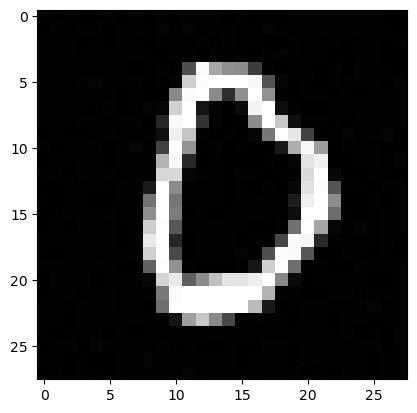

In [117]:
plt.imshow(hist_all[-1,4,0], cmap='gray')

202

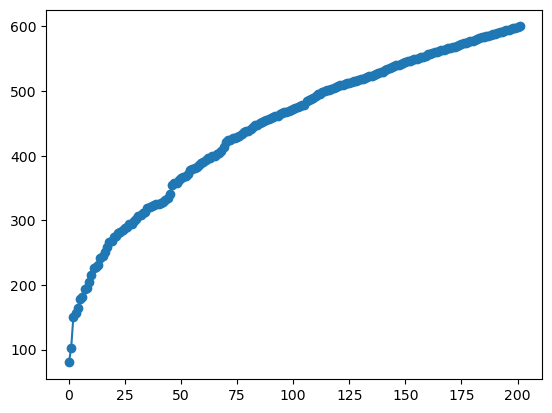

In [118]:
idx = []
import matplotlib.pyplot as plt
import numpy as np
for i in range(hist_all.shape[0]):
    eps = i/hist_all.shape[0]
    if np.random.rand() < eps**2:
        idx.append(i)

plt.plot(idx, marker='o')


idx = np.array(idx)

hist_plot = hist_all[idx]
len(idx)

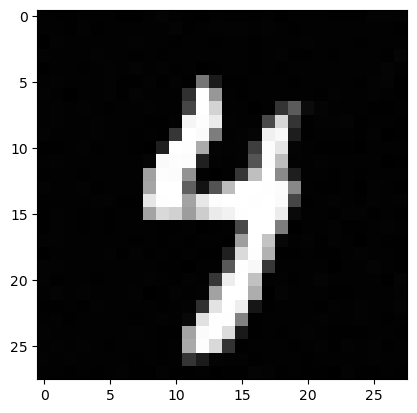

In [119]:
plt.imshow(frames[-1], cmap='gray')

MovieWriter imagemagick unavailable; using Pillow instead.


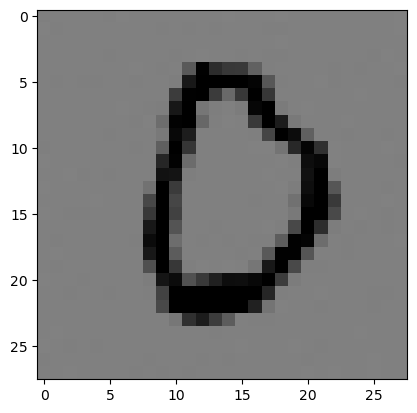

In [120]:
frames = hist_plot[:, 4].squeeze().copy()
# frames = np.clip(frames, 0, 1)

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
im = ax.imshow(frames[0], cmap='gray_r', animated=True, vmin=0., vmax=1.)

def update(i):
    x = frames[i]
    # x += np.min(x)
    # x /= np.max(x)
    im.set_array(x)


    return im,

ani = FuncAnimation(fig, update, frames=len(frames), interval=1000//30, blit=True)
ani.save('animation.gif', writer='imagemagick', fps=30)


In [121]:
hist_plot_2.shape

torch.Size([14, 5, 1, 28, 28])

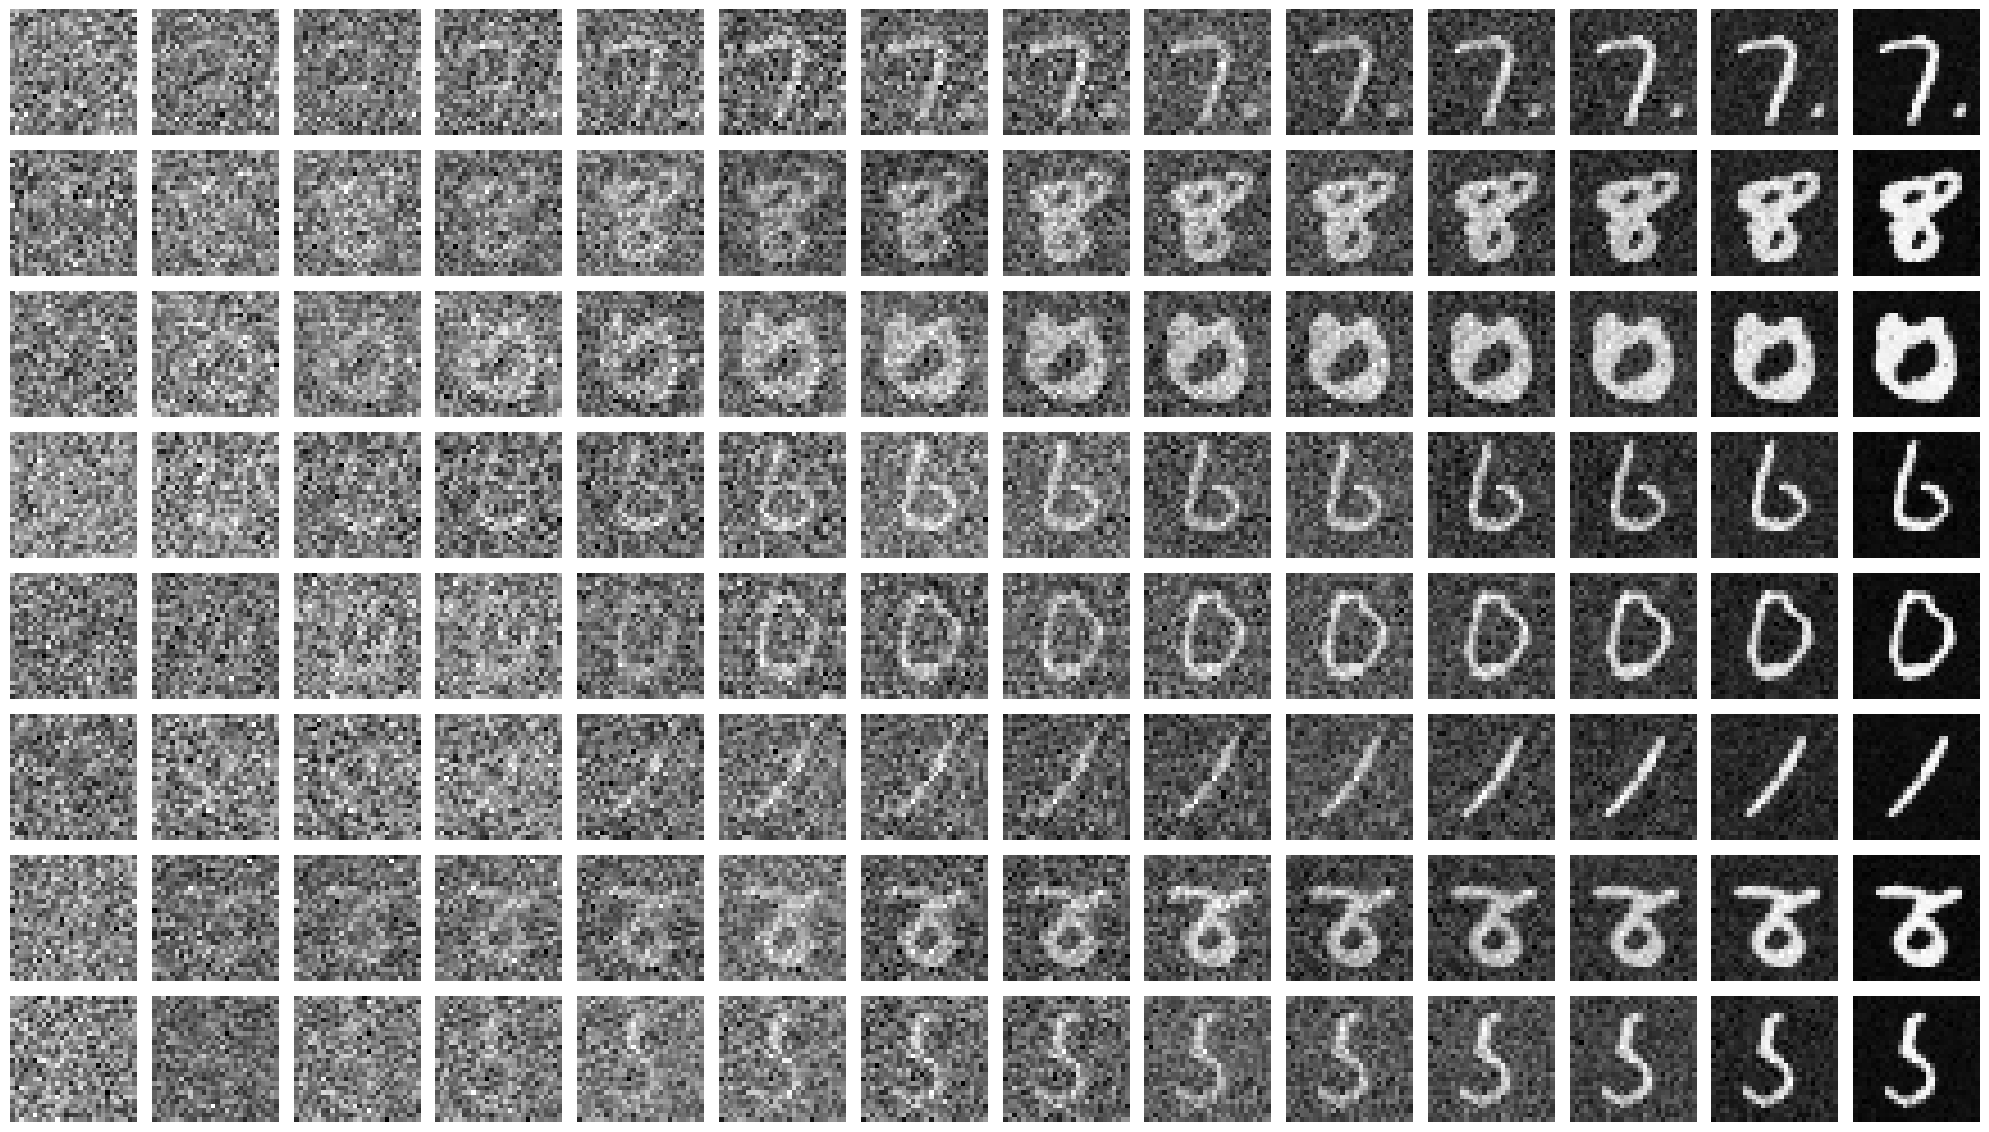

In [124]:
hist_plot_2 = hist_plot[::15, :8]

fig, ax = plt.subplots(hist_plot_2.shape[1], hist_plot_2.shape[0], figsize=(20, 20 * hist_plot_2.shape[1] / hist_plot_2.shape[0]))

for i in range(hist_plot_2.shape[1]):
    for j in range(hist_plot_2.shape[0]):
        ax[i, j].imshow(hist_plot_2[j, i].squeeze(), cmap='gray')
        ax[i, j].axis('off')

plt.tight_layout()
plt.show()


tensor([ 7.0820e-01,  3.3659e-01,  1.8853e-01,  ..., -1.8101e+34,
        -2.4118e+34, -3.0629e+34], device='mps:0')